In [29]:
import pandas as pd
dataset = pd.read_csv("invoice.csv")

In [32]:
dataset.head()

# dataset.tail() can be used to see the last 5 rows

,invoiceId,invoiceAmount,invoicePaidAmount,invoiceBalance,invoiceDiscountRate,invoiceDiscountAmount,invoiceProfit
0,1,1596.00,1596.00,0.00,5.0,84.00,135.0000
1,2,1790.46,1790.00,0.46,3.0,55.38,191.2048
2,3,1718.66,1718.66,0.00,6.5,119.48,122.6609
3,4,80.00,80.00,0.00,0.0,0.00,10.5000
4,5,28.26,28.26,0.00,0.0,0.00,3.6800


In [35]:
dataset_new=dataset[["invoiceAmount","invoiceDiscountRate"]]

In [39]:
dataset_new

,invoiceAmount,invoiceDiscountRate
0,1596.000,5.0
1,1790.460,3.0
2,1718.660,6.5
3,80.000,0.0
4,28.260,0.0
...,...,...
49992,480.000,4.0
49993,1325.597,3.0
49994,266.320,5.0
49995,314.510,5.0


In [7]:
X = dataset_new['invoiceAmount']
Y = dataset_new['invoiceDiscountRate']

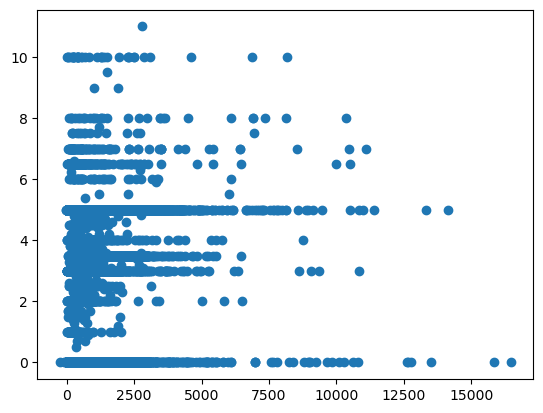

In [41]:
import matplotlib.pyplot as plt
plt.scatter(X,Y)

plt.show()

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y , test_size=0.2, random_state=20)

In [42]:
X_train

array([[ 500.   ],
       [ 766.365],
       [3105.   ],
       ...,
       [1417.4  ],
       [ 180.   ],
       [ 140.   ]])

In [43]:
X_test

array([[ 110.  ],
       [ 576.23],
       [1600.  ],
       ...,
       [ 150.  ],
       [ 100.  ],
       [ 370.  ]])

In [16]:
import numpy as np
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)

In [44]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [45]:
lr.fit(X_train,Y_train)

LinearRegression()

In [19]:
c = lr.intercept_
c

1.1461092560295385

In [20]:
m = lr.coef_
m

array([0.00091326])

In [50]:
Y_pred_train = m * X_train + c
Y_pred_train

array([[1.60273777],
       [1.84599747],
       [3.98177231],
       ...,
       [2.44055976],
       [1.31049552],
       [1.27396524]])

In [51]:
Y_pred_test = lr.predict(X_test)
Y_pred_test

array([1.24656753, 1.67235535, 2.60732049, ..., 1.28309781, 1.23743496,
       1.48401435])

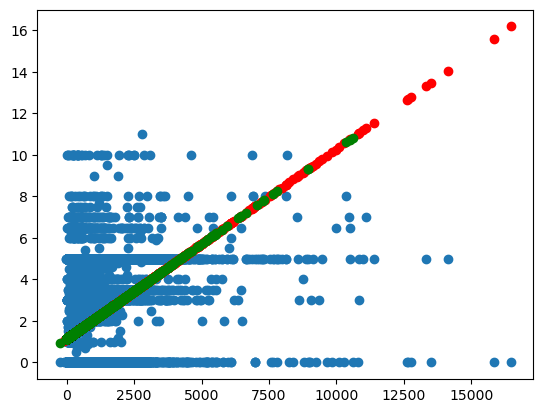

In [53]:
import matplotlib.pyplot as plt
plt.scatter(X,Y)
plt.scatter(X_train, Y_pred_train, color="red")
plt.scatter(X_test, Y_pred_test, color="green")

In [54]:
import pickle

In [55]:
pickle.dump(lr,open('model.pkl','wb'))
print("Model Created")

Model Created
